### bigquery 연동하기 

In [3]:
from google.oauth2 import service_account
from google.cloud import bigquery

In [4]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key_json.json")

In [5]:
credentials

In [6]:
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [7]:
client

### 서울 노인보행자 교통사고 유형분석
가설 : 생활 인구가 많은 곳이 교통사고가 많을까? 이례적으로 많은 곳이 있을까?

In [24]:
import matplotlib.pyplot as plt

In [20]:
import pandas as pd

In [12]:
sql = """
SELECT
*
FROM `moonlit-vine-428804-p9.semi_project.senior_accident_info`
WHERE sido_sgg_nm LIKE '서울특별시%'
"""

In [13]:
accident_seoul_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [14]:
accident_seoul_df["sido_sgg_nm"] = accident_seoul_df["sido_sgg_nm"].str.replace(r'서울특별시\s*([가-힣]+구)\d*', r'\1', regex=True)

In [15]:
classification_accident_df = accident_seoul_df.groupby('sido_sgg_nm')['occrrnc_cnt'].sum().reset_index()

In [16]:
cnt_gu_accident_loc_df = accident_seoul_df.groupby('sido_sgg_nm')['occrrnc_cnt'].count().reset_index()

In [17]:
cnt_gu_accident_loc_df.rename(columns={'sido_sgg_nm': 'sido_sgg_nm', 'occrrnc_cnt': 'accident_loc_cnt'}, inplace=True)

In [18]:
occrrnc_cnt = classification_accident_df[['occrrnc_cnt']]

In [21]:
result_df = pd.concat([cnt_gu_accident_loc_df.reset_index(drop=True), occrrnc_cnt.reset_index(drop=True)], axis=1)

In [27]:
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'AppleGothic'

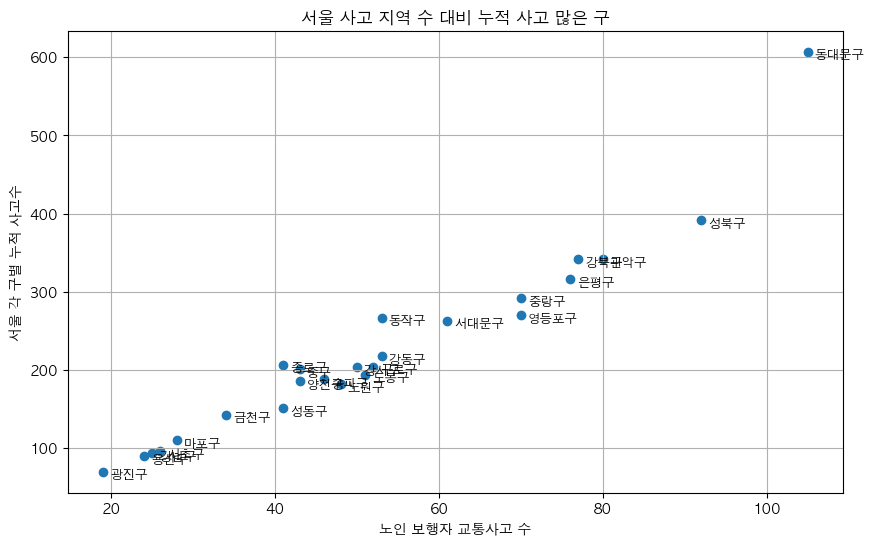

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['accident_loc_cnt'], result_df['occrrnc_cnt'])

for i in range(len(result_df)):
    plt.annotate(result_df['sido_sgg_nm'][i], 
                 (result_df['accident_loc_cnt'][i],result_df['occrrnc_cnt'][i]), 
                 textcoords="offset points", 
                 xytext=(5,-5), 
                 ha='left',
                 fontsize=9)

# 그래프 제목 및 축 레이블 추가
plt.title('서울 사고 지역 수 대비 누적 사고 많은 구')
plt.xlabel('노인 보행자 교통사고 수')
plt.ylabel('서울 각 구별 누적 사고수')
plt.grid(True)
plt.show()

### 서울 각 구별 노인 보행자 교통사고 수와 서울 각 구별 생활인구 비교

In [8]:
sql = """
SELECT
gu,
senior_total 
FROM `moonlit-vine-428804-p9.semi_project.LOCAL_PEOPLE_GU_2022`
"""

In [9]:
population_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


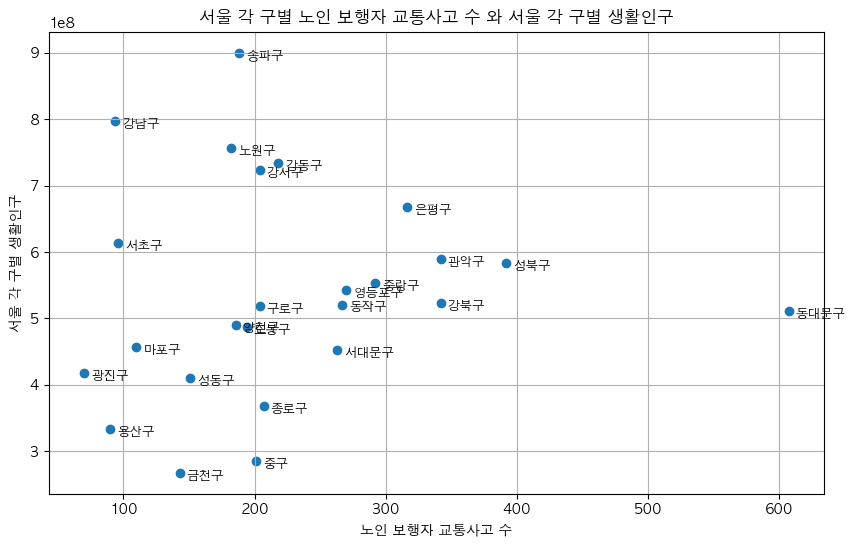

In [283]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df_merged['occrrnc_cnt'], population_df['senior_total'])

for i in range(len(result_df)):
    plt.annotate(result_df['sido_sgg_nm'][i], 
                 (result_df['occrrnc_cnt'][i], population_df['senior_total'][i]), 
                 textcoords="offset points", 
                 xytext=(5,-5), 
                 ha='left',
                 fontsize=9)

# 그래프 제목 및 축 레이블 추가
plt.title('서울 각 구별 노인 보행자 교통사고 수 와 서울 각 구별 생활인구')
plt.xlabel('노인 보행자 교통사고 수')
plt.ylabel('서울 각 구별 생활인구')
plt.grid(True)
plt.show()

### 동대문구 노인 보행자 사고지역 유형

In [56]:
sql = """
SELECT
*
FROM `moonlit-vine-428804-p9.semi_project.senior_accident_info`
WHERE sido_sgg_nm LIKE '서울특별시 동대문구%'
"""

In [57]:
dongdaemun_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [59]:
dongdaemun_df['acc_spot_nm'] = ''

In [60]:
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('시장'), 'acc_spot_nm'] = '시장'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('시장입구'), 'acc_spot_nm'] = '시장'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('시장사거리'), 'acc_spot_nm'] = '시장'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('시장앞'), 'acc_spot_nm'] = '시장'

dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('건강원'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('요양센터'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('약국'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('의원'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('병원앞'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('병원입구'), 'acc_spot_nm'] = '병원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('병원'), 'acc_spot_nm'] = '병원'

dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('삼거리'), 'acc_spot_nm'] = '교차로'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('사거리'), 'acc_spot_nm'] = '교차로'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('네거리'), 'acc_spot_nm'] = '교차로'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('오거리'), 'acc_spot_nm'] = '교차로'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('교차로'), 'acc_spot_nm'] = '교차로'

dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('경로당'), 'acc_spot_nm'] = '노인복지시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('노인복지관'), 'acc_spot_nm'] = '노인복지시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('노인회관'), 'acc_spot_nm'] = '노인복지시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('복지회관'), 'acc_spot_nm'] = '노인복지시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('센터'), 'acc_spot_nm'] = '노인복지시설'

dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('역 부근'), 'acc_spot_nm'] = '역'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('역앞'), 'acc_spot_nm'] = '역'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('정류장'), 'acc_spot_nm'] = '역'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('번출구'), 'acc_spot_nm'] = '역'

dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('교회'), 'acc_spot_nm'] = '종교시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('불교'), 'acc_spot_nm'] = '종교시설'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('은행'), 'acc_spot_nm'] = '은행'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('농협'), 'acc_spot_nm'] = '은행'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('신협'), 'acc_spot_nm'] = '은행'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('새마을금고'), 'acc_spot_nm'] = '은행'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('공원'), 'acc_spot_nm'] = '공원'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('빌라'), 'acc_spot_nm'] = '주거'
dongdaemun_df.loc[dongdaemun_df['spot_nm'].str.contains('아파트'), 'acc_spot_nm'] = '주거'


In [61]:
dongdaemun_df['acc_spot_nm'] = dongdaemun_df['acc_spot_nm'].replace('', '그 외')

In [62]:
classification_accident_df = dongdaemun_df.groupby('acc_spot_nm')['occrrnc_cnt'].sum().reset_index()

In [63]:
# classification_accident_df = classification_accident_df[classification_accident_df['acc_spot_nm'] != 'None']

In [64]:
classification_accident_df = classification_accident_df.sort_values(by='occrrnc_cnt', ascending=False)

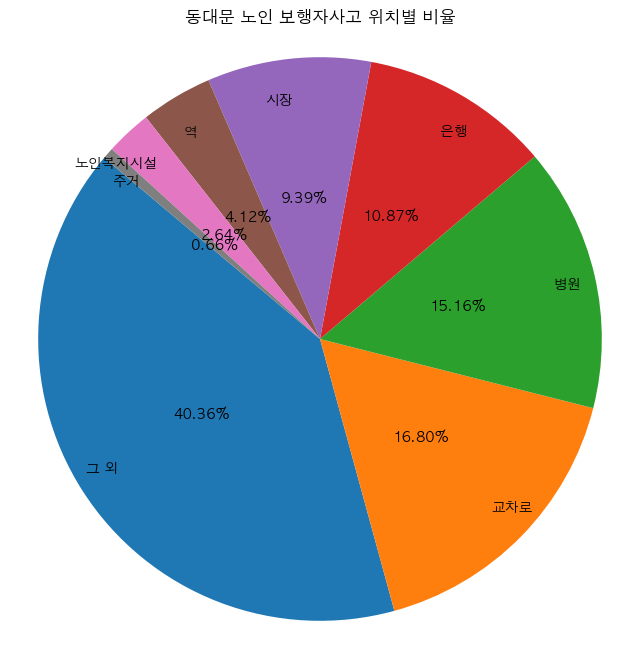

In [65]:
plt.figure(figsize=(8, 8))
plt.pie(classification_accident_df['occrrnc_cnt'], labels=classification_accident_df['acc_spot_nm'], autopct='%1.2f%%', startangle=140, pctdistance=0.5, labeldistance=0.85)
plt.title('동대문 노인 보행자사고 위치별 비율')
plt.axis('equal')  # 파이차트를 원형으로
plt.show()

In [29]:
file_path = 'senior_accident_info.csv'  # CSV 파일 경로를 여기에 입력하세요
df = pd.read_csv(file_path)

# '지역' 칼럼에 "서울특별시"로 시작하는 행을 선택
dondaemoon_df = df[df['sido_sgg_nm'].str.contains('^서울특별시 동대문', regex=True)]

In [30]:
dondaemoon_df

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd,year
0,6780496,2022042,1123010300,11230002,서울특별시 동대문구2,서울특별시 동대문구 제기동(우리은행청량리중앙지점 부근),9,9,0,9,0,0,"{""type"":""Polygon"",""coordinates"":[[[127.0419358...",127.041038,37.579109,2021
9,6780483,2022042,1123010200,11230001,서울특별시 동대문구1,서울특별시 동대문구 용두동(경동시장앞교차로 부근),9,10,0,10,0,0,"{""type"":""Polygon"",""coordinates"":[[[127.0394499...",127.038552,37.578198,2021
20,6098671,2015048,1123010700,11230002,서울특별시 동대문구2,서울특별시 동대문구 청량리동(청량리역_홍릉길_진입_1 부근),13,13,0,9,4,0,"{""type"":""Polygon"",""coordinates"":[[[127.0470933...",127.045492,37.580900,2014
26,6245427,2017029,1123010200,11230002,서울특별시 동대문구2,서울특별시 동대문구 용두동(경동시장 부근),12,14,1,10,2,1,"{""type"":""Polygon"",""coordinates"":[[[127.0401261...",127.038330,37.578243,2016
28,146243,2013098,1123010700,11230008,서울특별시 동대문구8,서울특별시 동대문구 청량리동(청량리역_일반국도6호선_진입_1 부근),16,16,0,10,5,1,"{""type"":""Polygon"",""coordinates"":[[[127.0457037...",127.044103,37.579895,2012
29,6245428,2017029,1123010300,11230001,서울특별시 동대문구1,서울특별시 동대문구 제기동(성바오로병원앞 부근),15,16,0,9,7,0,"{""type"":""Polygon"",""coordinates"":[[[127.0437795...",127.041983,37.579994,2016
227,6612146,2020027,1123010200,11230010,서울특별시 동대문구10,서울특별시 동대문구 용두동(마장동사거리 부근),3,3,0,0,3,0,"{""type"":""Polygon"",""coordinates"":[[[127.0397750...",127.037978,37.572878,2019
228,6607677,2020027,1123010700,11230011,서울특별시 동대문구11,서울특별시 동대문구 청량리동(청량리정신병원입구 부근),3,3,0,0,2,1,"{""type"":""Polygon"",""coordinates"":[[[127.0506737...",127.048877,37.586215,2019
276,6398399,2018029,1123010600,11230007,서울특별시 동대문구7,서울특별시 동대문구 장안동(배봉초교사거리 부근),4,4,1,0,3,0,"{""type"":""Polygon"",""coordinates"":[[[127.0705372...",127.068741,37.578693,2017
